In [7]:
import pickle

file = open('../data/data_prep.save', 'rb')
other_sets, test_sets = pickle.load(file)
file.close()

file = open('../results/log_models_tuned.save', 'rb')
logistic_models = pickle.load(file)
file.close()

file = open('../results/l1_models_tuned.save', 'rb')
l1_models = pickle.load(file)
file.close()

file = open('../results/l2_models_tuned.save', 'rb')
l2_models = pickle.load(file)
file.close()

file = open('../results/en_models_tuned.save', 'rb')
en_models = pickle.load(file)
file.close()

file = open('../results/rf_models_tuned.save', 'rb')
rf_models = pickle.load(file)
file.close()

file = open('../results/sv_models_tuned.save', 'rb')
svc_models = pickle.load(file)
file.close()

file = open('../results/knn_models_tuned.save', 'rb')
knn_models = pickle.load(file)
file.close()

file = open('../results/xgb_models_tuned.save', 'rb')
xgb_models = pickle.load(file)
file.close()

In [8]:
from sklearn.metrics import accuracy_score

log_scores = []
l1_scores = []
l2_scores = []
en_scores = []
rf_scores = []
svc_scores = []
knn_scores = []
xgb_scores = []

for i in range(10):
    
    X_test, y_test = test_sets[i]
    
    log_clf = logistic_models[i]
    l1_clf = l1_models[i]
    l2_clf = l2_models[i]
    en_clf = en_models[i]
    rf_clf = rf_models[i]
    svc_clf = svc_models[i]
    knn_clf = knn_models[i]
    xgb_clf = xgb_models[i]
    
    y_test_pred_log = log_clf.predict(X_test)
    y_test_pred_l1 = l1_clf.predict(X_test)
    y_test_pred_l2 = l2_clf.predict(X_test)
    y_test_pred_en = en_clf.predict(X_test)
    y_test_pred_rf = rf_clf.predict(X_test)
    y_test_pred_svc = svc_clf.predict(X_test)
    y_test_pred_knn = knn_clf.predict(X_test)
    y_test_pred_xgb = xgb_clf.predict(X_test)
    
    score_log = accuracy_score(y_test, y_test_pred_log)
    score_l1 = accuracy_score(y_test, y_test_pred_l1)
    score_l2 = accuracy_score(y_test, y_test_pred_l2)
    score_en = accuracy_score(y_test, y_test_pred_en)
    score_rf = accuracy_score(y_test, y_test_pred_rf)
    score_svc = accuracy_score(y_test, y_test_pred_svc)
    score_knn = accuracy_score(y_test, y_test_pred_knn)
    score_xgb = accuracy_score(y_test, y_test_pred_xgb)

    log_scores.append(score_log)
    l1_scores.append(score_l1)
    l2_scores.append(score_l2)
    en_scores.append(score_en)
    rf_scores.append(score_rf)
    svc_scores.append(score_svc)
    knn_scores.append(score_knn)
    xgb_scores.append(score_xgb)

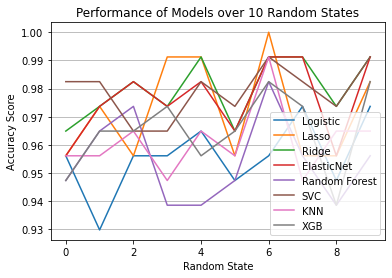

In [10]:
import matplotlib.pyplot as plt

plt.plot(log_scores, label="Logistic")
plt.plot(l1_scores, label="Lasso")
plt.plot(l2_scores, label="Ridge")
plt.plot(en_scores, label="ElasticNet")
plt.plot(rf_scores, label="Random Forest")
plt.plot(svc_scores, label="SVC")
plt.plot(knn_scores, label="KNN")
plt.plot(xgb_scores, label="XGB")
plt.grid(axis='y')
plt.xlabel("Random State")
plt.ylabel("Accuracy Score")
plt.title("Performance of Models over 10 Random States")
plt.legend()
plt.savefig('../figures/models_by_rs.png', dpi=300, format='png')
plt.show()

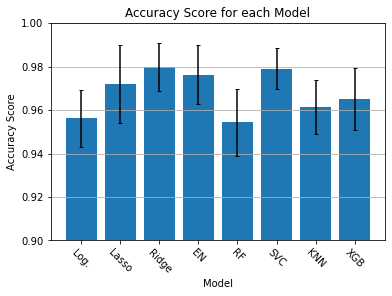

In [11]:
from statistics import mean, stdev

labels = ["Log.", "Lasso", "Ridge", "EN", "RF", "SVC", "KNN", "XGB"]
scores = [log_scores, l1_scores, l2_scores, en_scores, rf_scores, svc_scores, knn_scores, xgb_scores]
mean_scores = [mean(score) for score in scores]
stdev_scores = [stdev(score) for score in scores]

plt.bar(labels, mean_scores, yerr=stdev_scores, capsize=2)
plt.ylim([0.9,1])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for each Model")
plt.savefig('../figures/score_by_model.png', dpi=300, format='png')
plt.show()

In [5]:
for model in l2_models:
    print(f"Best Model: {model.best_params_}")
    print()

Best Model: {'classifier__C': 0.1, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 0.1, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}

Best Model: {'classifier__C': 1.0, 'classifier__max_iter': 100000}



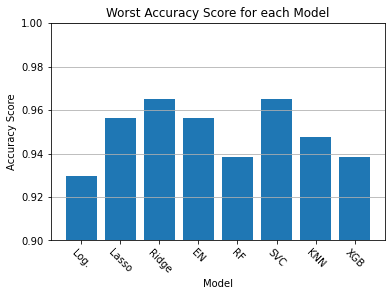

In [12]:
min_scores = [min(score) for score in scores]

plt.bar(labels, min_scores)
plt.ylim([0.9,1])
plt.xticks(rotation=-45)
plt.grid(axis='y')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Worst Accuracy Score for each Model")
plt.savefig('../figures/worst_score_by_model.png', dpi=300, format='png')
plt.show()